# Part 2 - Constructing CSG geometry

This python notebook allows users to build upon the geometry constructed in Part 1 by adding a center column to the model.

The center column requires a different surface type. OpenMC has several different surface types in addition to spheres. The documentation contains useful information on all surface types supported: https://openmc.readthedocs.io/en/stable/usersguide/geometry.html#surfaces-and-regions.

For the center column we will use a cylinder with Z axis orientation.

The code block below shows how the center column can be defined.

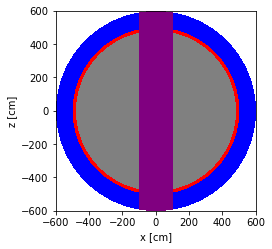

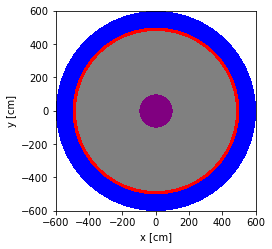

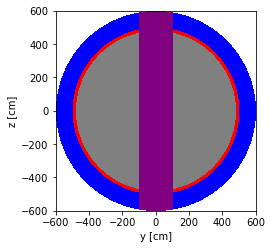

In [2]:
import openmc

# surfaces
central_column_surface = openmc.ZCylinder(r=100) # note the new surface type
inner_sphere_surface = openmc.Sphere(r=480)
middle_sphere_surface = openmc.Sphere(r=500) 
outer_sphere_surface = openmc.Sphere(r=600, boundary_type='vacuum')

# regions
# the center column region is cut at the top and bottom using the -outer_sphere_surface
central_column_region = -central_column_surface & -outer_sphere_surface
firstwall_region = -middle_sphere_surface & +inner_sphere_surface & +central_column_surface
blanket_region = +middle_sphere_surface & -outer_sphere_surface & +central_column_surface
inner_vessel_region = +central_column_surface & -inner_sphere_surface

# cells
firstwall_cell = openmc.Cell(region=firstwall_region)
central_column_cell = openmc.Cell(region=central_column_region)
blanket_cell = openmc.Cell(region=blanket_region)
inner_vessel_cell = openmc.Cell(region=inner_vessel_region)

geometry = openmc.Geometry([central_column_cell, firstwall_cell, blanket_cell, inner_vessel_cell])

# visualization
color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red',
                    inner_vessel_cell:'grey', central_column_cell:'purple'}

plot = geometry.plot(basis='xz', color_by='cell', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy', color_by='cell',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz', color_by='cell',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

Another way to add the center column shape is to use Boolean operators. This is shown in the code block below.

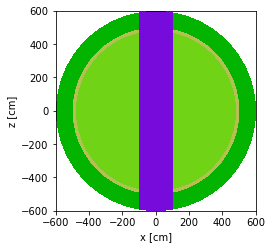

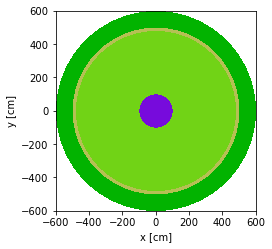

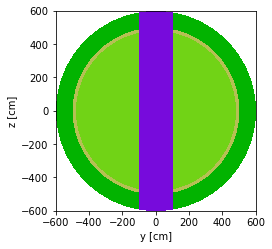

In [3]:
# surfaces
central_column_surface = openmc.ZCylinder(r=100) # note the new surface type
inner_sphere_surface = openmc.Sphere(r=480)
middle_sphere_surface = openmc.Sphere(r=500) 
outer_sphere_surface = openmc.Sphere(r=600, boundary_type='vacuum')

# regions, this time defined using boolean operators
# There are 3 operators to choose from
#     | OR
#     & AND
#     ~ NOT
# This examples uses the ~ NOT operators

central_column_region = -central_column_surface & -outer_sphere_surface

# the inner_vessel_region is defined using the logical NOT operator ~
inner_vessel_region = -inner_sphere_surface & ~central_column_region

# the firstwall_region is defined as below the middle surface and not in two other regions
firstwall_region = -middle_sphere_surface & ~inner_vessel_region & ~central_column_region

# the blanket_region is defined as between two surfaces and not the center_column_region
blanket_region = +middle_sphere_surface & -outer_sphere_surface & ~central_column_region


# cells defined in the same way
firstwall_cell = openmc.Cell(region=firstwall_region)
central_column_cell = openmc.Cell(region=central_column_region)
blanket_cell = openmc.Cell(region=blanket_region)
inner_vessel_cell = openmc.Cell(region=inner_vessel_region)

geometry = openmc.Geometry(cells=[central_column_cell, firstwall_cell,
                                  blanket_cell, inner_vessel_cell])

# VISULISATION
color_assignment = {blanket_cell: 'blue', firstwall_cell: 'red',
                    inner_vessel_cell:'grey', central_column_cell:'purple'}

plot = geometry.plot(basis='xz', color_by='cell', colors=color_assignment)
plot.figure.savefig('xz-cell.png')

plot = geometry.plot(basis='xy', color_by='cell',  colors=color_assignment)
plot.figure.savefig('xy-cell.png')

plot = geometry.plot(basis='yz', color_by='cell',  colors=color_assignment)
plot.figure.savefig('yz-cell.png')

More details on CSG geometry construction methods can be found here:
https://docs.openmc.org/en/stable/usersguide/geometry.html.

Additionally, OpenMC has a geometry viewing package which can be found here: https://github.com/openmc-dev/plotter.

**Learning Outcomes for Part 2:**

- Using different surface types in OpenMC to construct CSG.
- Defining geometry surfaces, regions and cells.

Bonus knowledge

- There is an excelent geometry viewing package for OpenMC that also supports mesh tally visualization.
https://github.com/openmc-dev/plotter